In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
#Natural Language Processing
#nltk – Natural Language Toolkit is a collection of libraries for natural language processing
#stopwords – a collection of words that don’t provide any meaning to a sentence
#WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [4]:
# Scikit-Learn
#CountVectorizer – transform text to vectors
#GridSearchCV – for hyperparameter tuning
#RandomForestClassifier – machine learning algorithm for classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [5]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
#from scikitplot.metrics import plot_confusion_matrix

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df.head(100)

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
95,3,0,3,0,1,"""@CauseWereGuys: Going back to school sucks mo..."
96,3,0,3,0,1,"""@CauseWereGuys: On my way to fuck yo bitch ht..."
97,3,0,3,0,1,"""@CeleyNichole: @white_thunduh how come you ne..."
98,3,0,3,0,1,"""@ChadMFVerbeck: If Richnow doesn't show up wi..."


In [8]:
#count of each hatespeech
print('hate :',df['class'].value_counts()[0])
print('offensive:',df['class'].value_counts()[1])
print('neutral :',df['class'].value_counts()[2])

hate : 1430
offensive: 19190
neutral : 4163


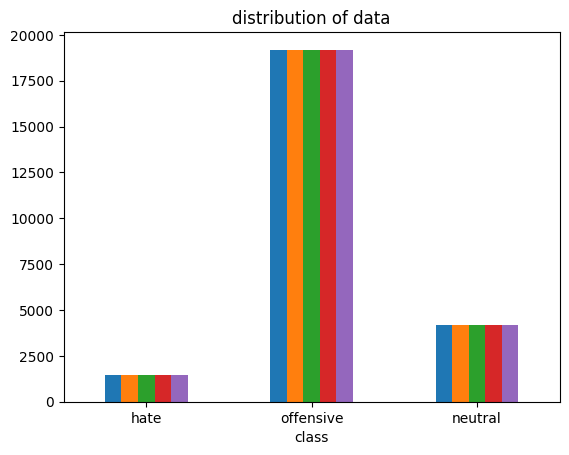

In [9]:
#plotting the count graph
gr=df.groupby('class').count().plot(kind='bar',title='distribution of data',legend=False)
gr.set_xticklabels(['hate','offensive','neutral'],rotation=0)
#storing the data in lists
text,sentiment=list(df['tweet']),list(df['class'])

In [10]:
#DATA PREPROCESSING
stopwords = nltk.corpus.stopwords.words("english")#stop words
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
# stemmer = PorterStemmer() #extending the stopwords to include other words used in twitter such as retweet(rt) etc.
lm = WordNetLemmatizer()
stemmer = PorterStemmer()

In [11]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
def cleaning_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize the text into words
    words = text.split()
    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords]
    # Stem the filtered words
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    # Join the stemmed words back into a string
    processed_text = " ".join(stemmed_words)
    return processed_text

# Preprocess the sample text
df['tweet']=df['tweet'].apply(cleaning_text)

In [13]:
df['tweet'].head(100)

0     woman complain clean hous amp man alway take t...
1     boy dat cold tyga dwn bad cuffin dat hoe st place
2            dawg ever fuck bitch start cri confus shit
3                                      look like tranni
4        shit hear might true might faker bitch told ya
                            ...                        
95                  go back school suck dick hoe attend
96                           way fuck yo bitch year old
97                come never bring food dont car retard
98    richnow show hella tinder hoe im friend anymor...
99                             bout cowboy shutup pussi
Name: tweet, Length: 100, dtype: object

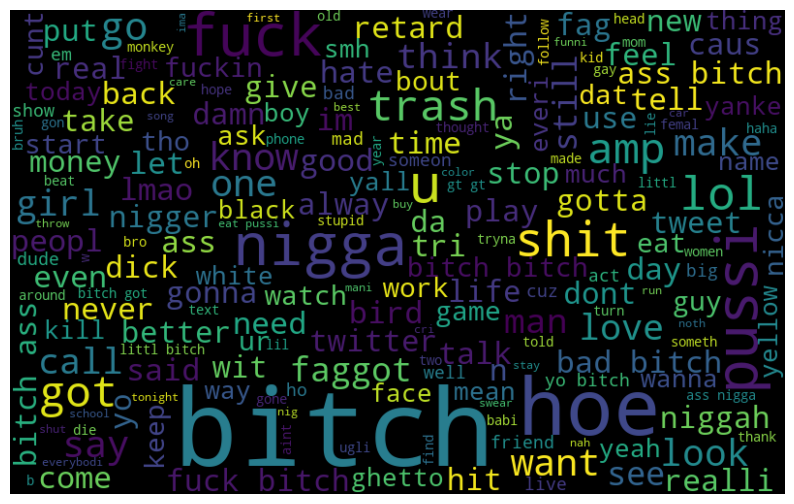

In [14]:
# visualizing
#MOST COMMONLY USED WORDS IN DATASET 
all_words = ' '.join([text for text in df['tweet'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

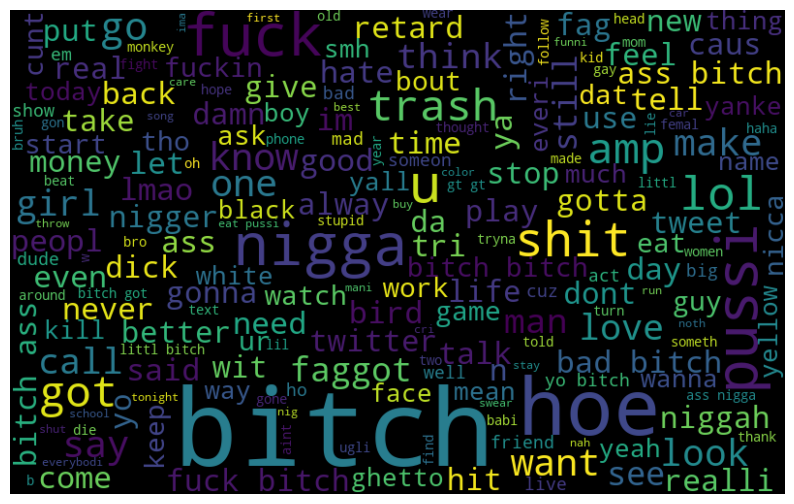

In [15]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in df['tweet'][df['class'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

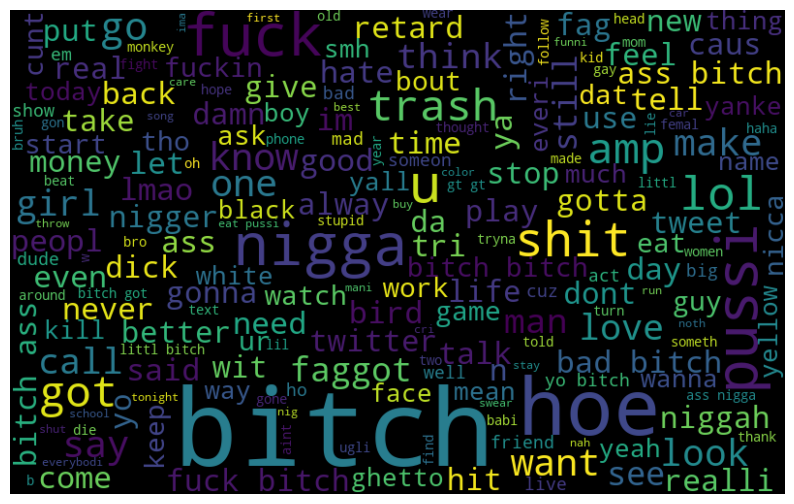

In [16]:
#offesive word visulization
offensive_words = ' '.join([text for text in df['tweet'][df['class'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
#spliting the dataset
x=df['tweet']
y=df['class']


In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
cv = CountVectorizer(ngram_range=(1,2))
X_train_vec= cv.fit_transform(x_train)

In [37]:
X_test_vec = cv.transform(x_test)

In [40]:
model=LogisticRegression()
model.fit(X_train_vec,y_train)
y_pred=model.predict(X_test_vec)
acc_score = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test,y_pred,average='macro')
rec_score = recall_score(y_test,y_pred,average='macro')
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy_score:  0.9045793826911438
Precision_score:  0.7604418506459019
Recall_score:  0.7088275252820253
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.27      0.35       290
           1       0.94      0.95      0.94      3832
           2       0.84      0.91      0.87       835

    accuracy                           0.90      4957
   macro avg       0.76      0.71      0.72      4957
weighted avg       0.89      0.90      0.90      4957



In [42]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")
# function to take the input statement and perform the same transformations we did earlier


In [49]:
def sentiment_predictor(input):
    # input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model.predict(transformed_input)
    expression_check(prediction)


In [50]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]


In [51]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Positive Sentiment.
Invalid Statement.
